## Import, download and install useful Python packages

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install nltk

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install spark-nlp==3.4.3

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install transformers

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install -U scikit-learn==0.21.3

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import ArrayType
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql import functions as sf
from pyspark.sql import SparkSession
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.feature import Word2Vec
from pyspark.sql.functions import countDistinct
from pyspark.ml.feature import HashingTF, CountVectorizer, IDF, NGram, Tokenizer
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import array
from pyspark.ml.evaluation import ClusteringEvaluator
import re
import sklearn
import gc
import warnings    
import requests
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from matplotlib.ticker import MaxNLocator
%matplotlib inline
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline 

/local_disk0/.ephemeral_nfs/envs/pythonEnv-431e53b8-bc26-449d-b987-4e21e3c1abb1/lib/python3.8/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/local_disk0/.ephemeral_nfs/envs/pythonEnv-431e53b8-bc26-449d-b987-4e21e3c1abb1/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specific

In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Out[2]: True

In [0]:
%sh wget -P /tmp https://github.com/rigelshysaj/project/raw/master/News_Category_Dataset_v2.json.bz2

--2022-06-10 04:40:46--  https://github.com/rigelshysaj/project/raw/master/News_Category_Dataset_v2.json.bz2
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rigelshysaj/project/master/News_Category_Dataset_v2.json.bz2 [following]
--2022-06-10 04:40:46--  https://raw.githubusercontent.com/rigelshysaj/project/master/News_Category_Dataset_v2.json.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17880051 (17M) [application/octet-stream]
Saving to: ‘/tmp/News_Category_Dataset_v2.json.bz2’

     0K .......... .......... .......... .......... ..........  0% 3.40M 5s
    50K .......... ..........

In [0]:
%fs ls file:/tmp/

path name size modificationTime file:/tmp/.font-unix/ .font-unix/ 4096 1654832450302 file:/tmp/systemd-private-f635c2dae8b34a32968a43c56f737262-systemd-resolved.service-bpqOXg/ systemd-private-f635c2dae8b34a32968a43c56f737262-systemd-resolved.service-bpqOXg/ 4096 1654832450306 file:/tmp/chauffeur-daemon-params chauffeur-daemon-params 22 1654832464022 file:/tmp/driver-daemon.pid driver-daemon.pid 4 1654832479994 file:/tmp/custom-spark.conf custom-spark.conf 214 1654832461486 file:/tmp/systemd-private-f635c2dae8b34a32968a43c56f737262-ntp.service-wK7Gff/ systemd-private-f635c2dae8b34a32968a43c56f737262-ntp.service-wK7Gff/ 4096 1654832450350 file:/tmp/systemd-private-f635c2dae8b34a32968a43c56f737262-systemd-logind.service-tcJFph/ systemd-private-f635c2dae8b34a32968a43c56f737262-systemd-logind.service-tcJFph/ 4096 1654832450366 file:/tmp/systemd-private-f635c2dae8b34a32968a43c56f737262-apache2.service-JdulSf/ systemd-private-f635c2dae8b34a32968a43c56f737262-apache2.service-JdulSf/ 4096 1654832468834 file:/tmp/driver-daemon-params driver-daemon-params 19 1654832479526 file:/tmp/.Test-unix/ .Test-unix/ 4096 1654832450302 file:/tmp/ipykernel-connection-ReplId-325be-cf75a-c17bf-6.json ipykernel-connection-ReplId-325be-cf75a-c17bf-6.json 294 1654836043947 file:/tmp/.X11-unix/ .X11-unix/ 4096 1654832450302 file:/tmp/hsperfdata_root/ hsperfdata_root/ 4096 1654832480086 file:/tmp/Rserv/ Rserv/ 4096 1654832547274 file:/tmp/tmp.TIBpvnEZUP tmp.TIBpvnEZUP 0 1654832464358 file:/tmp/.ICE-unix/ .ICE-unix/ 4096 1654832450302 file:/tmp/chauffeur-daemon.pid chauffeur-daemon.pid 4 1654832464434 file:/tmp/driver-env.sh driver-env.sh 3265 1654832477838 file:/tmp/.XIM-unix/ .XIM-unix/ 4096 1654832450302 file:/tmp/RtmpzkphGl/ RtmpzkphGl/ 4096 1654832753696 file:/tmp/News_Category_Dataset_v2.json.bz2 News_Category_Dataset_v2.json.bz2 17880051 1654836047039 file:/tmp/chauffeur-env.sh chauffeur-env.sh 156 1654832461286

In [0]:
dbutils.fs.mv("file:/tmp/News_Category_Dataset_v2.json.bz2", "dbfs:/bdc-2020-21/datasets/News_Category_Dataset_v2.json.bz2")

Out[4]: True

In [0]:
news_df = spark.read.load("dbfs:/bdc-2020-21/datasets/News_Category_Dataset_v2.json.bz2", 
                         format="json",
                         inferSchema="true", 
                         header="true"
                         )

### Data analysing

In [0]:
n_df = news_df.toPandas()

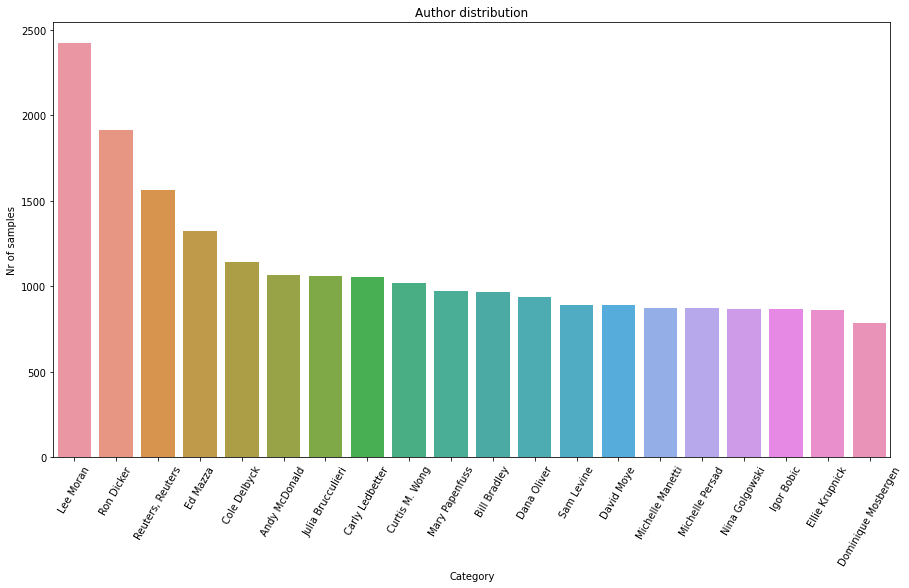

In [0]:
authors = n_df['authors'].value_counts()
authors = authors[1:]
authors = authors[:20]
plt.figure(figsize=(15,8))
sns.barplot(x=authors.index, y=authors.values)
plt.title("Author distribution")
plt.xlabel("Category")
plt.ylabel("Nr of samples")

plt.xticks(rotation=60,fontsize = 10)
plt.show()

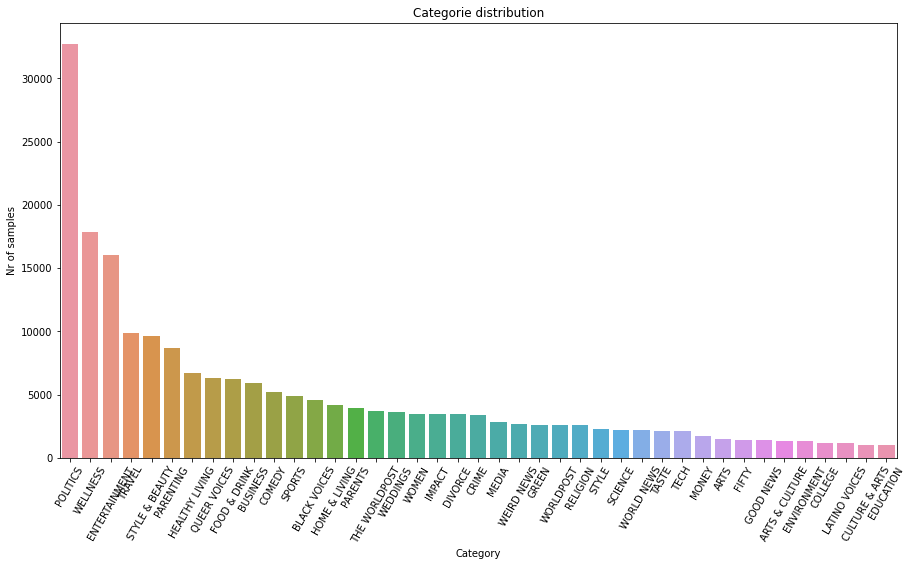

In [0]:
category = n_df['category'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=category.index, y=category.values)
plt.title("Categorie distribution")
plt.xlabel("Category")
plt.ylabel("Nr of samples")

plt.xticks(rotation=60,fontsize = 10)
plt.show()

Out[9]: <AxesSubplot:ylabel='category'>

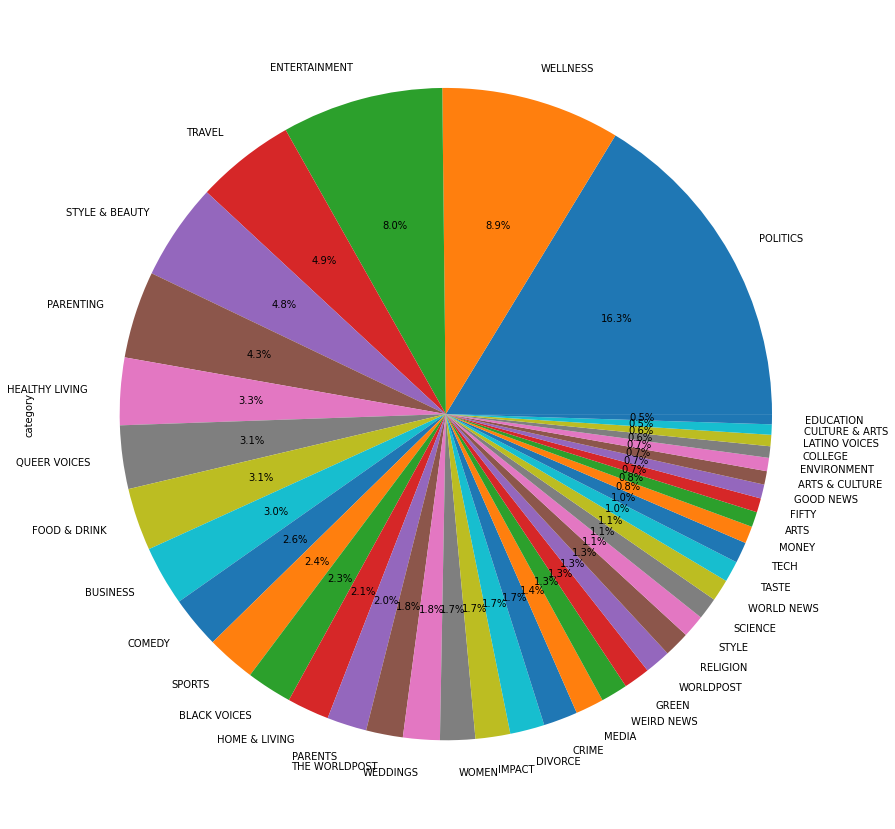

In [0]:
#plotting the categories
fig, ax = plt.subplots(1, 1, figsize=(15,15))
n_df['category'].value_counts().plot.pie( autopct = '%1.1f%%')

In [0]:
import datetime
import plotly.graph_objs as go
n_df['year'] = pd.DatetimeIndex(n_df['date']).year
labels = n_df['year'].value_counts().index
values = n_df['year'].value_counts().values
colors = n_df['year']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent", marker = dict(colors = colors))])
fig.show()

In [0]:
n_df['month'] = pd.DatetimeIndex(n_df['date']).month
labels = n_df['month'].value_counts().index
values = n_df['month'].value_counts().values
colors = n_df['month']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent", marker = dict(colors = colors))])
fig.show()

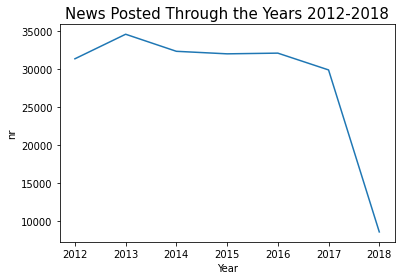

In [0]:
df_aux = n_df['year'].value_counts()
df_aux = pd.DataFrame({'Year': df_aux.index,
                    'nr': df_aux.values})
df_aux = df_aux.sort_values(['nr'], ascending=False).reset_index(drop=True)
ax = sns.lineplot(x="Year", y="nr", data=df_aux)
plt.title("News Posted Through the Years 2012-2018",
          fontweight="light", size=15);

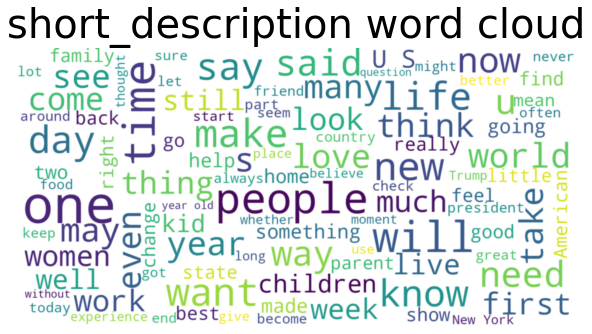

In [0]:
from wordcloud import WordCloud
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500,
                       max_font_size=150, min_font_size=30,
                       background_color="white").generate(" ".join(n_df['short_description']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('short_description word cloud', fontsize = 40)
plt.axis("off")
plt.show()

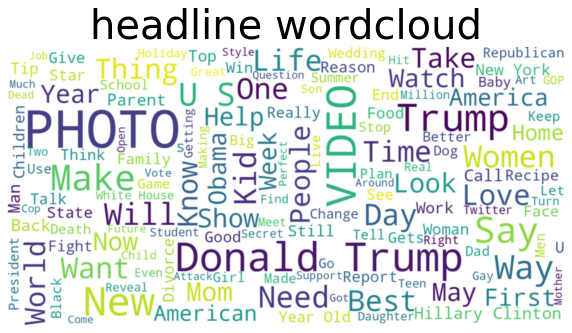

In [0]:
word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       margin=0,
                       max_words=500,
                       max_font_size=150, min_font_size=30,
                       background_color="white").generate(" ".join(n_df['headline']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('headline wordcloud', fontsize = 40)
plt.axis("off")
plt.show()

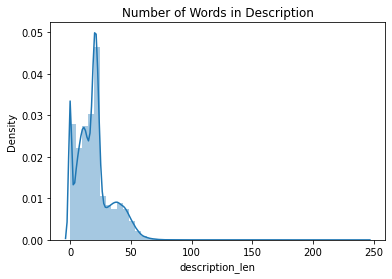

In [0]:
df = news_df.toPandas()
df['description_len'] = df['short_description'].apply(lambda x: len(str(x).split()))
df['headline_len'] = df['headline'].apply(lambda x: len(str(x).split()))
sns.distplot(df['description_len'])
plt.title('Number of Words in Description')
plt.show()

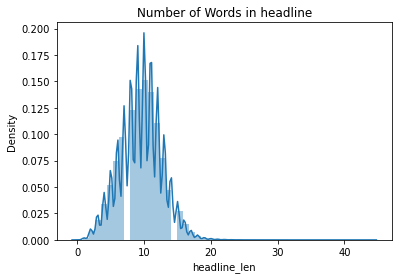

In [0]:
sns.distplot(df['headline_len'])
plt.title('Number of Words in headline')
plt.show()

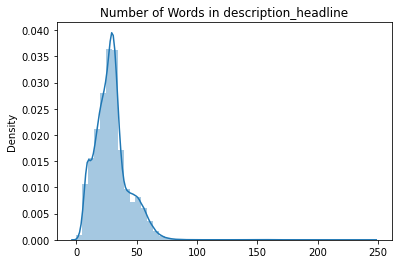

In [0]:
df['description_headline'] = df['headline'] + df['short_description']
sns.distplot(df['headline_len'] + df['description_len'])
plt.title('Number of Words in description_headline')
plt.show()

### Chi-square

In [0]:
#Before performig Ch-Square test we have to make sure data is label encoded.
label_encoder = LabelEncoder()
n_df['short_description'] = label_encoder.fit_transform(n_df['short_description'])
n_df['headline'] = label_encoder.fit_transform(n_df['headline'])
n_df['authors'] = label_encoder.fit_transform(n_df['authors'])
n_df['link'] = label_encoder.fit_transform(n_df['link'])
n_df['date'] = label_encoder.fit_transform(n_df['date'])

In [0]:
X = n_df.drop('category',axis=1)
y = n_df['category']

In [0]:
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [0]:
print(X_kbest)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
X.columns[chi2_selector.get_support()]

[[166667 112147]
 [194852  97977]
 [ 85579 125724]
 ...
 [ 70202  85552]
 [ 22610  35864]
 [ 57017 130764]]
Original number of features: (200853, 7)
Reduced number of features: (200853, 2)
Out[21]: Index(['headline', 'short_description'], dtype='object')

In [0]:
#As replace is default set to FALSE it is not allowed to repeat elements. It will randomly select unique elements
#news_df = news_df.limit(10000)
news_df = news_df.sample(False, 0.1, seed=0).limit(10000)

In [0]:
category_df = news_df.drop('short_description', 'headline', 'authors', 'link', 'date')

In [0]:
#printing the nr of different categories
category_df.select(countDistinct("category")).show()

+------------------------+
|count(DISTINCT category)|
+------------------------+
|                      26|
+------------------------+



In [0]:
category_df.show(5)

+-------------+
|     category|
+-------------+
|        CRIME|
|ENTERTAINMENT|
|ENTERTAINMENT|
|ENTERTAINMENT|
|ENTERTAINMENT|
+-------------+
only showing top 5 rows



In [0]:
news_df = news_df.withColumn('description_headline', 
                    sf.concat(sf.col('short_description'),sf.lit('_'), sf.col('headline')))

In [0]:
news_df = news_df.drop('short_description', 'headline', 'authors', 'link', 'date', 'category')

In [0]:
news_df.printSchema()
category_df.printSchema()

root
 |-- description_headline: string (nullable = true)

root
 |-- category: string (nullable = true)



In [0]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(category_df.count(), len(category_df.columns)))
print("The shape of the dataset is {:d} rows by {:d} columns".format(news_df.count(), len(news_df.columns)))

The shape of the dataset is 10000 rows by 1 columns
The shape of the dataset is 10000 rows by 1 columns


In [0]:
RANDOM_SEED = 42 

In [0]:
def convert(df, column_name="category"):
    label_stringIdx = StringIndexer(inputCol = column_name, outputCol = "categoryIndex")
    df1 = label_stringIdx.fit(df).transform(df)
    vecAssembler = VectorAssembler(inputCols=["categoryIndex"], outputCol="features")
    features_df = vecAssembler.transform(df1)

    return features_df

In [0]:
features = convert(category_df)

In [0]:
features.show(5)

+-------------+-------------+--------+
|     category|categoryIndex|features|
+-------------+-------------+--------+
|        CRIME|         10.0|  [10.0]|
|ENTERTAINMENT|          1.0|   [1.0]|
|ENTERTAINMENT|          1.0|   [1.0]|
|ENTERTAINMENT|          1.0|   [1.0]|
|ENTERTAINMENT|          1.0|   [1.0]|
+-------------+-------------+--------+
only showing top 5 rows



In [0]:
features.select(col("features")).show(10, truncate=False)

+--------+
|features|
+--------+
|[10.0]  |
|[1.0]   |
|[1.0]   |
|[1.0]   |
|[1.0]   |
|[1.0]   |
|[1.0]   |
|[1.0]   |
|[1.0]   |
|[1.0]   |
+--------+
only showing top 10 rows



# **K-means Clustering**

In [0]:
DISTANCE_MEASURE = "euclidean"

#Limits the number of iterations in the k-means algorithm. Iteration stops after this many iterations even if the convergence criterion is not satisfied. This number must be between 1 and 999.

MAX_ITERATIONS = 100

#Tolerance value is used to check if the error is greater than the tolerance value. For error greater than tolerance value, K-means algorithm is run until the error falls below the tolerance value which implies that the algorithm has converged.

TOLERANCE = 0.000001

### Running K-means

In [0]:
def k_means(dataset, n_clusters, distance_measure=DISTANCE_MEASURE, max_iter=MAX_ITERATIONS, tol=TOLERANCE, features_col="features", prediction_col="cluster", random_seed=RANDOM_SEED):

  print("""Training K-means clustering using the following parameters: 
  - K (n. of clusters) = {:d}
  - max_iter (max n. of iterations) = {:d}
  - distance measure = {:s}
  - random seed = {:d}
  """.format(n_clusters, max_iter, distance_measure, random_seed))
  kmeans = KMeans(featuresCol=features_col, predictionCol=prediction_col, k=n_clusters, initMode="k-means||", initSteps=5, tol=tol, maxIter=max_iter,     seed=random_seed, distanceMeasure=distance_measure)
  model = kmeans.fit(dataset)
  clusters_df = model.transform(dataset).cache()
  return model, clusters_df

### Silhouette Coefficient and elbow method

In [0]:
def evaluate_k_means(clusters, metric_name="silhouette", distance_measure="squaredEuclidean", prediction_col="cluster"):
  evaluator = ClusteringEvaluator(metricName=metric_name, distanceMeasure=distance_measure, predictionCol=prediction_col)

  return evaluator.evaluate(clusters)

In [0]:
def do_clustering():
    clustering_results = {}
    for k in range(5, 51 + 1, 5):
        print("Running K-means using K = {:d}".format(k))
        model, clusters_df = k_means(features, k, max_iter=50, distance_measure="euclidean") 
        silhouette_k = evaluate_k_means(clusters_df, distance_measure="squaredEuclidean") 
        wssd_k = model.summary.trainingCost
        print("Silhouette coefficient computed with cosine distance: {:.3f}".format(silhouette_k))
        print("Within-cluster Sum of Squared Distances (using cosine distance): {:.3f}".format(wssd_k))
        print("--------------------------------------------------------------------------------------")
        clustering_results[k] = (silhouette_k, wssd_k)
        del model
        del clusters_df
        gc.collect()
    return clustering_results

In [0]:
clustering_results = do_clustering()

Running K-means using K = 5
Training K-means clustering using the following parameters: 
  - K (n. of clusters) = 5
  - max_iter (max n. of iterations) = 50
  - distance measure = euclidean
  - random seed = 42
  
Silhouette coefficient computed with cosine distance: 0.815
Within-cluster Sum of Squared Distances (using cosine distance): 10069.958
--------------------------------------------------------------------------------------
Running K-means using K = 10
Training K-means clustering using the following parameters: 
  - K (n. of clusters) = 10
  - max_iter (max n. of iterations) = 50
  - distance measure = euclidean
  - random seed = 42
  
Silhouette coefficient computed with cosine distance: 0.797
Within-cluster Sum of Squared Distances (using cosine distance): 2996.790
--------------------------------------------------------------------------------------
Running K-means using K = 15
Training K-means clustering using the following parameters: 
  - K (n. of clusters) = 15
  - max_i

In [0]:
def plot_clustering_results(clustering_results):
    df = pd.DataFrame.from_dict(clustering_results, orient='index').reset_index()
    df.columns = ['K','Silhouette', 'WSSD']
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    _ = sns.pointplot(data=df, x="K", y="WSSD", ax=ax, color="orangered")
    _ = ax.set_xlabel("K")
    _ = ax.set_ylabel("WSSD")

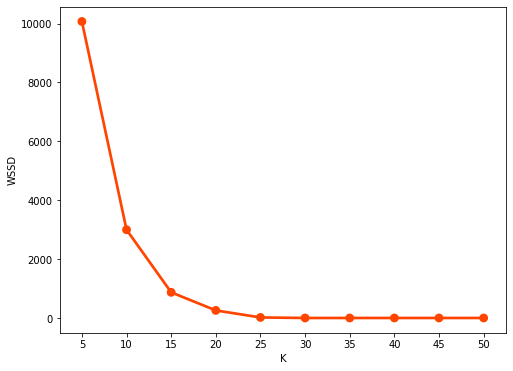

In [0]:
plot_clustering_results(clustering_results)

In [0]:
model, clusters_df = k_means(features, 5, max_iter=50, distance_measure="euclidean")
clusters_df.cache()

Training K-means clustering using the following parameters: 
  - K (n. of clusters) = 5
  - max_iter (max n. of iterations) = 50
  - distance measure = euclidean
  - random seed = 42
  
Out[42]: DataFrame[category: string, categoryIndex: double, features: vector, cluster: int]

In [0]:
clusters_df[clusters_df['cluster'] == 4].show(20)

+-------------+-------------+--------+-------+
|     category|categoryIndex|features|cluster|
+-------------+-------------+--------+-------+
|       IMPACT|         13.0|  [13.0]|      4|
|       IMPACT|         13.0|  [13.0]|      4|
|     BUSINESS|         11.0|  [11.0]|      4|
|       IMPACT|         13.0|  [13.0]|      4|
|       TRAVEL|         15.0|  [15.0]|      4|
|     RELIGION|         14.0|  [14.0]|      4|
|       IMPACT|         13.0|  [13.0]|      4|
|       TRAVEL|         15.0|  [15.0]|      4|
|       TRAVEL|         15.0|  [15.0]|      4|
|       TRAVEL|         15.0|  [15.0]|      4|
|LATINO VOICES|         12.0|  [12.0]|      4|
|     RELIGION|         14.0|  [14.0]|      4|
|     RELIGION|         14.0|  [14.0]|      4|
|       IMPACT|         13.0|  [13.0]|      4|
|       TRAVEL|         15.0|  [15.0]|      4|
|     BUSINESS|         11.0|  [11.0]|      4|
|LATINO VOICES|         12.0|  [12.0]|      4|
|       IMPACT|         13.0|  [13.0]|      4|
|     RELIGIO

In [0]:
c_df = clusters_df.toPandas()

Out[45]: <AxesSubplot:ylabel='cluster'>

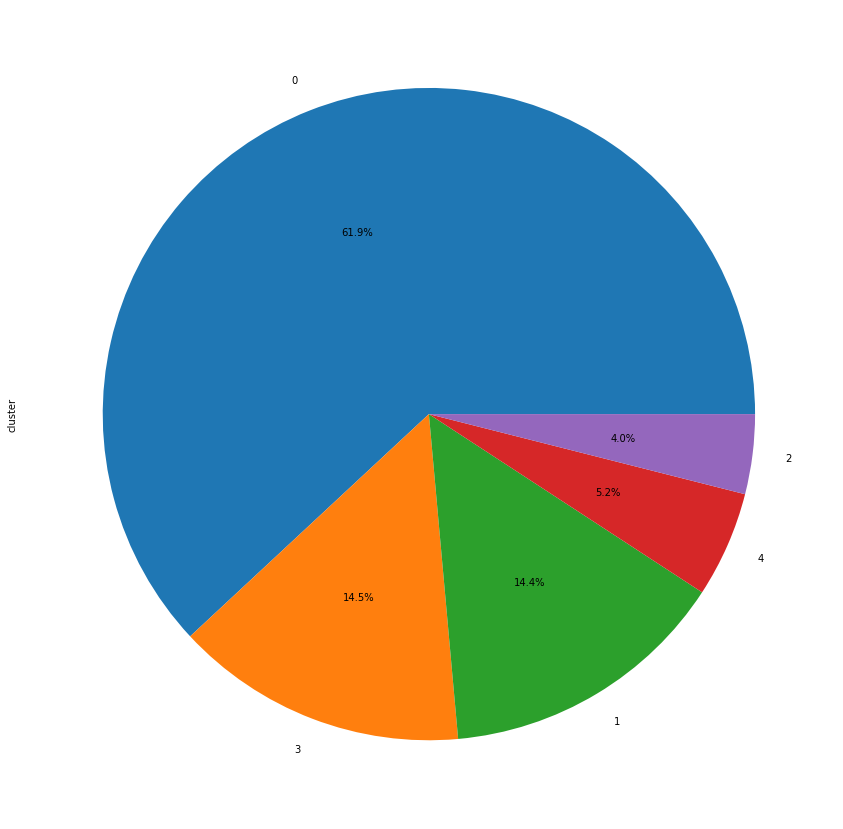

In [0]:
#plotting the cluster
fig, ax = plt.subplots(1, 1, figsize=(15,15))
c_df['cluster'].value_counts().plot.pie( autopct = '%1.1f%%')

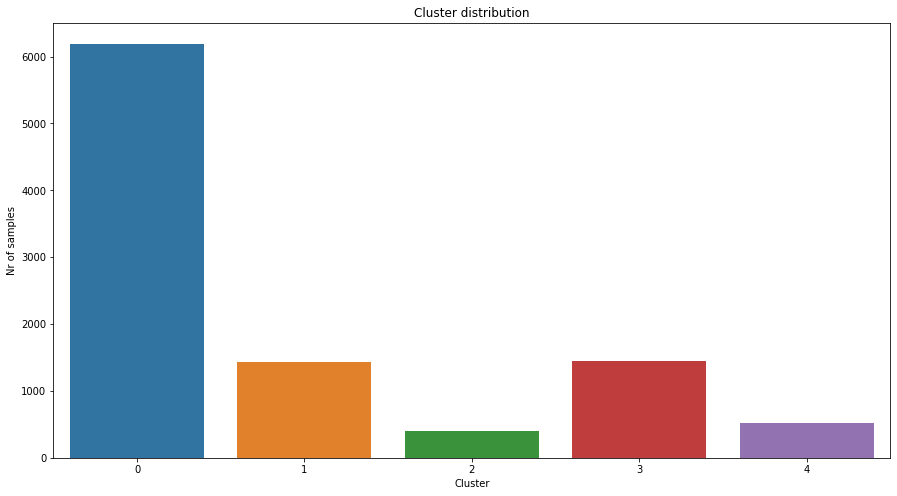

In [0]:
cluster = c_df['cluster'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=cluster.index, y=cluster.values)
plt.title("Cluster distribution")
plt.xlabel("Cluster")
plt.ylabel("Nr of samples")

plt.xticks(fontsize = 10)
plt.show()

In [0]:
clusters_df = clusters_df.drop('category', 'features', 'categoryIndex')

In [0]:
#printing the number of clusters
clusters_df.select(countDistinct("cluster")).show()

+-----------------------+
|count(DISTINCT cluster)|
+-----------------------+
|                      5|
+-----------------------+



In [0]:
clusters_df.show(5)

+-------+
|cluster|
+-------+
|      1|
|      0|
|      0|
|      0|
|      0|
+-------+
only showing top 5 rows



In [0]:
news_df.show(5)

+--------------------+
|description_headline|
+--------------------+
|She left her husb...|
|Of course it has ...|
|The actor and his...|
|The actor gives D...|
|The "Dietland" ac...|
+--------------------+
only showing top 5 rows



In [0]:
w=Window.orderBy(lit(1))
news_df_new=news_df.withColumn("rn",row_number().over(w)-1)
clusters_df_new=clusters_df.withColumn("rn",row_number().over(w)-1)

In [0]:
news_df_new = news_df_new.join(clusters_df_new,["rn"]).drop("rn")

In [0]:
news_df_new.show(5)

+--------------------+-------+
|description_headline|cluster|
+--------------------+-------+
|She left her husb...|      1|
|Of course it has ...|      0|
|The actor and his...|      0|
|The actor gives D...|      0|
|The "Dietland" ac...|      0|
+--------------------+-------+
only showing top 5 rows



In [0]:
# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="description_headline", outputCol="words", pattern="\\W")
# stop words
add_stopwords = list(stopwords.words('english'))
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

### TF-IDF and WORD2VEC

In [0]:
label_stringIdx = StringIndexer(inputCol = "cluster", outputCol = "label")
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
#Words below the minCount frequency are dropped before training occurs
#w2v = Word2Vec(vectorSize = 300, minCount = 0, inputCol = "filtered", outputCol = "features")
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=0)
#pipeline = Pipeline(stages = [regexTokenizer, stopwordsRemover, w2v, label_stringIdx])
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx])
pipelineFit = pipeline.fit(news_df_new)
dataset = pipelineFit.transform(news_df_new)
trainingSet, testSet = dataset.randomSplit([0.7, 0.3], seed = 100)

### Models training

In [0]:

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingSet)
#lrModel.save("dbfs:/Users/rigelshysaj/LogisticRegressionTFIDF")
#lrModel.save("dbfs:/Users/rigelshysaj/LogisticRegressionWORD2VEC")
predictions = lrModel.transform(testSet)

trainingSummary = lrModel.summary
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s" % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))


Accuracy: 0.9473908716052893
FPR: 0.08472412100046244
TPR: 0.9473908716052893
F-measure: 0.9460976284745454
Precision: 0.9513402252608261
Recall: 0.9473908716052893


In [0]:
from pyspark.ml.classification import LogisticRegressionModel
lrModelSaved = LogisticRegressionModel.load("dbfs:/Users/rigelshysaj/LogisticRegressionTFIDF")
#lrModelSaved = LogisticRegressionModel.load("dbfs:/Users/rigelshysaj/LogisticRegressionWORD2VEC")
predictions = lrModelSaved.transform(testSet)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="f1")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="precisionByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="recallByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))

accuracy
0.6858779912369397
f1
0.6281346721462101
precisionByLabel
0.6966067864271457
recallByLabel
0.9494015233949945


In [0]:
'''
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) 
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2])
             .build())

cv = CrossValidator(estimator=lr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)
cvModel = cv.fit(trainingSet)
#cvModel.save("dbfs:/Users/rigelshysaj/CrossValidatorWORD2VEC")
#cvModel.save("dbfs:/Users/rigelshysaj/CrossValidatorTFIDF")
predictions = cvModel.transform(testSet)
'''

Out[60]: '\nlr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)\nfrom pyspark.ml.tuning import ParamGridBuilder, CrossValidator\nparamGrid = (ParamGridBuilder()\n             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) \n             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2])\n             .build())\n\ncv = CrossValidator(estimator=lr,                     estimatorParamMaps=paramGrid,                     evaluator=evaluator,                     numFolds=5)\ncvModel = cv.fit(trainingSet)\n#cvModel.save("dbfs:/Users/rigelshysaj/CrossValidatorWORD2VEC")\n#cvModel.save("dbfs:/Users/rigelshysaj/CrossValidatorTFIDF")\npredictions = cvModel.transform(testSet)\n'

In [0]:
from pyspark.ml.tuning import CrossValidatorModel
cvModelSaved = CrossValidatorModel.load("dbfs:/Users/rigelshysaj/CrossValidatorTFIDF")
#cvModelSaved = CrossValidatorModel.load("dbfs:/Users/rigelshysaj/CrossValidatorWORD2VEC")
predictions = cvModelSaved.transform(testSet)

In [0]:
# Evaluate best model
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="precisionByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="f1")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="recallByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))

precisionByLabel
0.7181236673773987
accuracy
0.6852039096730704
f1
0.6424956886420247
recallByLabel
0.9162132752992383


In [0]:
'''
from pyspark.ml.classification import LinearSVC, OneVsRest
linearSvc = LinearSVC(maxIter=10, regParam=0.1)
oVr = OneVsRest(classifier=linearSvc)
oVrModel = oVr.fit(trainingSet)
#oVrModel.save("dbfs:/Users/rigelshysaj/LinearSvcTFIDF")
#oVrModel.save("dbfs:/Users/rigelshysaj/LinearSvcWORD2VEC")
predictions = oVrModel.transform(testSet)
'''

Out[63]: '\nfrom pyspark.ml.classification import LinearSVC, OneVsRest\nlinearSvc = LinearSVC(maxIter=10, regParam=0.1)\noVr = OneVsRest(classifier=linearSvc)\noVrModel = oVr.fit(trainingSet)\n#oVrModel.save("dbfs:/Users/rigelshysaj/LinearSvcTFIDF")\n#oVrModel.save("dbfs:/Users/rigelshysaj/LinearSvcWORD2VEC")\npredictions = oVrModel.transform(testSet)\n'

In [0]:
from pyspark.ml.classification import OneVsRestModel
oVrModelSaved = OneVsRestModel.load("dbfs:/Users/rigelshysaj/LinearSvcTFIDF")
#oVrModelSaved = OneVsRestModel.load("dbfs:/Users/rigelshysaj/LinearSvcWORD2VEC")
predictions = oVrModelSaved.transform(testSet)

In [0]:
''''
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import LinearSVC, OneVsRest

linearSvc = LinearSVC(maxIter=10, regParam=0.1)
oVr = OneVsRest(classifier=linearSvc)

paramGrid = (ParamGridBuilder().build())
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=oVr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)
cvModel = cv.fit(trainingSet)
predictions = cvModel.transform(testSet)
'''

Out[65]: "'\nfrom pyspark.ml.tuning import ParamGridBuilder, CrossValidator\nfrom pyspark.ml.classification import LinearSVC, OneVsRest\n\nlinearSvc = LinearSVC(maxIter=10, regParam=0.1)\noVr = OneVsRest(classifier=linearSvc)\n\nparamGrid = (ParamGridBuilder().build())\n# Create 5-fold CrossValidator\ncv = CrossValidator(estimator=oVr,                     estimatorParamMaps=paramGrid,                     evaluator=evaluator,                     numFolds=5)\ncvModel = cv.fit(trainingSet)\npredictions = cvModel.transform(testSet)\n"

In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="precisionByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(metricName="f1")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="recallByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))

precisionByLabel
0.764554353426069
accuracy
0.6548702392989552
f1
0.6463254864278377
recallByLabel
0.8073993471164309


In [0]:
'''
from pyspark.ml.classification import NaiveBayes
#smoothing = 1 is being used to resolve the problem of zero probability in the Naive Bayes algorithm
nb = NaiveBayes(smoothing=1, modelType="multinomial")
nbModel = nb.fit(trainingSet)
#nbModel.save("dbfs:/Users/rigelshysaj/NaiveBayesTFIDF")
#nbModel.save("dbfs:/Users/rigelshysaj/NaiveBayesWORD2VEC")
predictions = nbModel.transform(testSet)
'''

Out[67]: '\nfrom pyspark.ml.classification import NaiveBayes\n#smoothing = 1 is being used to resolve the problem of zero probability in the Naive Bayes algorithm\nnb = NaiveBayes(smoothing=1, modelType="multinomial")\nnbModel = nb.fit(trainingSet)\n#nbModel.save("dbfs:/Users/rigelshysaj/NaiveBayesTFIDF")\n#nbModel.save("dbfs:/Users/rigelshysaj/NaiveBayesWORD2VEC")\npredictions = nbModel.transform(testSet)\n'

In [0]:
from pyspark.ml.classification import NaiveBayesModel
nbModelSaved = NaiveBayesModel.load("dbfs:/Users/rigelshysaj/NaiveBayesTFIDF")
#nbModelSaved = NaiveBayesModel.load("dbfs:/Users/rigelshysaj/NaiveBayesWORD2VEC")
predictions = nbModelSaved.transform(testSet)

In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="precisionByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="f1")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="recallByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))

precisionByLabel
0.8058022498519835
accuracy
0.6423997303673744
f1
0.6520320726567641
recallByLabel
0.7404787812840044


In [0]:
'''
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="label", \
                            featuresCol="features")
# Train model with Training Data
dtModel = dt.fit(trainingSet)
#dtModel.save("dbfs:/Users/rigelshysaj/DecisionTreeTFIDF")
#dtModel.save("dbfs:/Users/rigelshysaj/DecisionTreeWORD2VEC")
predictions = dtModel.transform(testSet)
'''

Out[70]: '\nfrom pyspark.ml.classification import DecisionTreeClassifier\ndt = DecisionTreeClassifier(labelCol="label",                             featuresCol="features")\n# Train model with Training Data\ndtModel = dt.fit(trainingSet)\n#dtModel.save("dbfs:/Users/rigelshysaj/DecisionTreeTFIDF")\n#dtModel.save("dbfs:/Users/rigelshysaj/DecisionTreeWORD2VEC")\npredictions = dtModel.transform(testSet)\n'

In [0]:
from pyspark.ml.classification import DecisionTreeClassificationModel
dtModelSaved = DecisionTreeClassificationModel.load("dbfs:/Users/rigelshysaj/DecisionTreeTFIDF")
#dtModelSaved = DecisionTreeClassificationModel.load("dbfs:/Users/rigelshysaj/DecisionTreeWORD2VEC")
predictions = dtModelSaved.transform(testSet)

In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="f1")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="precisionByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="recallByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))

accuracy
0.6528479946073474
f1
0.5460202612987168
precisionByLabel
0.6473326172574293
recallByLabel
0.9836779107725789


In [0]:
'''
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="label", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)
# Train model with Training Data
rfModel = rf.fit(trainingSet)
#rfModel.save("dbfs:/Users/rigelshysaj/RandomForestTFIDF")
#rfModel.save("dbfs:/Users/rigelshysaj/RandomForestWORD2VEC")
predictions = rfModel.transform(testSet)
'''

Out[73]: '\nfrom pyspark.ml.classification import RandomForestClassifier\nrf = RandomForestClassifier(labelCol="label",                             featuresCol="features",                             numTrees = 100,                             maxDepth = 4,                             maxBins = 32)\n# Train model with Training Data\nrfModel = rf.fit(trainingSet)\n#rfModel.save("dbfs:/Users/rigelshysaj/RandomForestTFIDF")\n#rfModel.save("dbfs:/Users/rigelshysaj/RandomForestWORD2VEC")\npredictions = rfModel.transform(testSet)\n'

In [0]:
from pyspark.ml.classification import RandomForestClassificationModel
rfModelSaved = RandomForestClassificationModel.load("dbfs:/Users/rigelshysaj/RandomForestTFIDF")
#rfModelSaved = RandomForestClassificationModel.load("dbfs:/Users/rigelshysaj/RandomForestWORD2VEC")
predictions = rfModelSaved.transform(testSet)

In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="f1")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="precisionByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="recallByLabel")
print(evaluator.getMetricName())
print(evaluator.evaluate(predictions))

accuracy
0.6194809571958207
f1
0.47392549399622
precisionByLabel
0.6194809571958207
recallByLabel
1.0
